In [1]:
import tuw_nlp
tuw_nlp.download_alto()
tuw_nlp.download_definitions()

In [2]:
from tuw_nlp.grammar.text_to_4lang import TextTo4lang
from tuw_nlp.graph.utils import graph_to_pn

## 1. General usage

### Initialize TextTo4lang

The parameters are `language`, `nlp_cache`, `cache_dir`

In [8]:
tfl = TextTo4lang("en", "en_nlp_cache")

2021-11-25 13:12:59 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-11-25 13:12:59 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |
| depparse  | ewt     |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |
| depparse  | ewt     |

2021-11-25 13:12:59 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-11-25 13:12:59 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-11-25 13:12:59 INFO: Loading: pos
INFO:stanza:Loading: pos
2021-11-25 13:13:00 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2021-11-25 13:13:00 INFO: Loading: depparse
INFO:stanza:Loading: depparse
2021-11-25 13:13:00 INFO: Done loading processors!
INFO:stanza:Done loading processors!


### Parsing a sentence

`TextTo4lang` can be called with a context manager, it only has 1 required parameter, the `text` itself:

In [11]:
fl_graphs = list(tfl("Yellow hat"))

Processing tmp/20211125_131355_122277/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(yellow)),NOUN(hat)))          ] 63 ms
2 [dummy(dummy)                                      ] 365 μs
Done, total time: 90 ms


### Displaying the graph

The `FourLang` can be converted to a dot format, which can be visualized with the graphviz package

In [12]:
from tuw_nlp.graph.fourlang import FourLang
from graphviz import Source

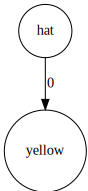

In [16]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [17]:
tfl.lexicon.get_definition("brown")

'A colour like that of chocolate or coffee.'

## 2. Expanding and Reducing a sentence

`TextTo4lang` has two optional parameters, `depth`, which indicates the recursion depth when expanding the graph, and `substitute`, which can be used to reduce the vocabulary of the graph by substituting the _expanded_ node with the root of its definition graph.

The default value for `depth` is 0, and `substitute` is set to _False_ by default.

In [18]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=False))

Processing tmp/20211125_131609_550091/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(brown)),NOUN(dog)))           ] 58 ms
2 [dummy(dummy)                                      ] 377 μs
Done, total time: 84 ms
Processing tmp/20211125_131610_247507/input.txt (2 instances) ...
1 [ROOT(NOUN(_DET(DET(a)),NOUN(_PUNCT(PUNCT(COMMA)),N] 209 ms
2 [dummy(dummy)                                      ] 859 μs
Done, total time: 299 ms
Processing tmp/20211125_131613_193943/input.txt (2 instances) ...
1 [ROOT(NOUN(_DET(DET(a)),NOUN(_NMOD(PRON(_CASE(ADP(l] 128 ms
2 [dummy(dummy)                                      ] 642 μs
Done, total time: 191 ms


In [19]:
fl_graphs[0].nodes(data=True)

NodeDataView({2: {'name': 'dog', 'expanded': True}, 3: {'name': 'brown', 'expanded': True}, 4: {'name': 'mammal'}, 5: {'name': 'familiaris'}, 6: {'name': 'domesticate'}, 7: {'name': 'of'}, 8: {'name': 'appearance'}, 9: {'name': 'variable'}, 10: {'name': 'highly'}, 11: {'name': 'due'}, 12: {'name': 'breeding'}, 13: {'name': 'human'}, 14: {'name': 'for'}, 15: {'name': 'thousand'}, 16: {'name': 'year'}, 17: {'name': 'lupus'}, 18: {'name': 'canis'}, 19: {'name': 'colour'}, 20: {'name': 'like'}, 21: {'name': 'that'}, 22: {'name': 'COORD'}, 23: {'name': 'coffee'}, 24: {'name': 'chocolate'}})

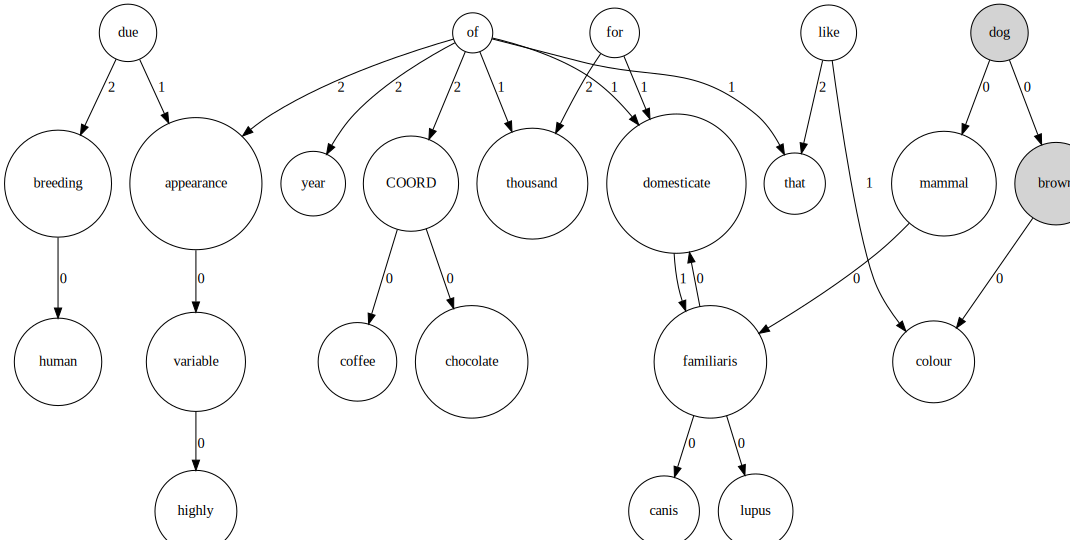

In [20]:
Source(FourLang(fl_graphs[0], None).to_dot())

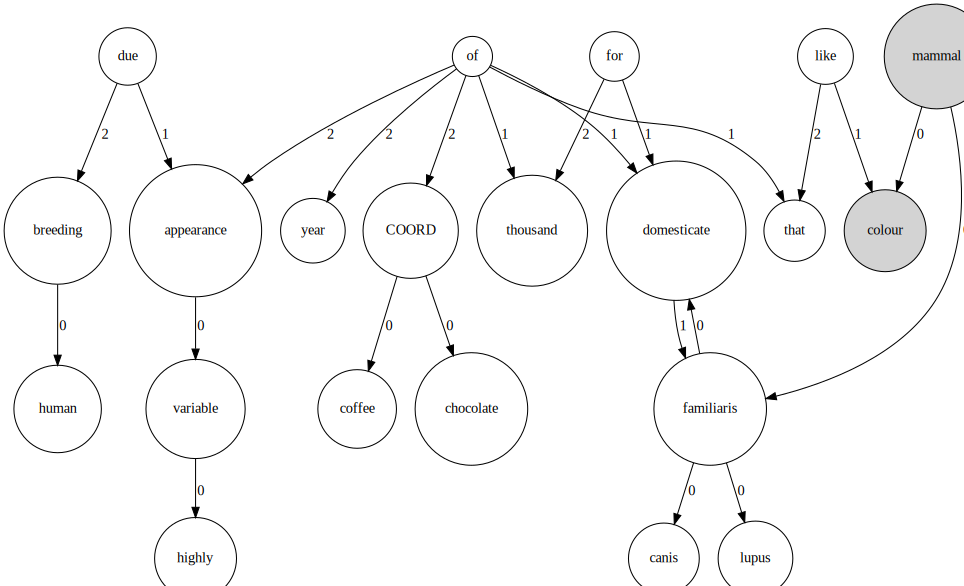

In [21]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=True))
Source(FourLang(fl_graphs[0], None).to_dot())

## 3. Using another language

Currently, besides English, TextTo4lang can be used with German as well

In [22]:
tfl = TextTo4lang("de", "de_nlp_cache")

2021-11-25 13:16:15 INFO: Loading these models for language: de (German):
| Processor  | Package |
------------------------
| tokenize   | gsd     |
| fix_ssplit | default |

INFO:stanza:Loading these models for language: de (German):
| Processor  | Package |
------------------------
| tokenize   | gsd     |
| fix_ssplit | default |

2021-11-25 13:16:15 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-11-25 13:16:15 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-11-25 13:16:15 INFO: Loading: fix_ssplit
INFO:stanza:Loading: fix_ssplit
2021-11-25 13:16:15 INFO: Done loading processors!
INFO:stanza:Done loading processors!
2021-11-25 13:16:15 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

INFO:stanza:Loading these models for language: de (German):
| Processor | Package |
-----------------------
| t

In [23]:
fl_graphs = list(tfl("brauner Hund", depth=1, substitute=False))

Processing tmp/20211125_131623_801411/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(braun)),NOUN(Hund)))          ] 53 ms
2 [dummy(dummy)                                      ] 576 μs
Done, total time: 78 ms
Processing tmp/20211125_131623_423014/input.txt (2 instances) ...
1 [ROOT(NOUN(_ACL(NOUN(_PUNCT(PUNCT(COMMA)),NOUN(_DET] 58 ms
2 [dummy(dummy)                                      ] 456 μs
Done, total time: 79 ms
Processing tmp/20211125_131627_859419/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(erdig)),NOUN(_CONJ(NOUN(_PUNCT] 175 ms
2 [dummy(dummy)                                      ] 555 μs
Done, total time: 222 ms


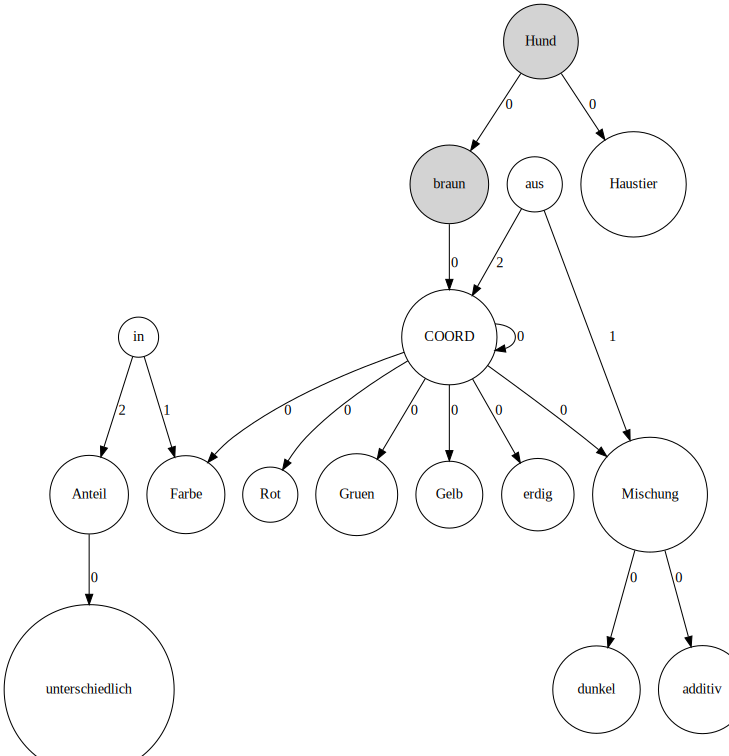

In [24]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [25]:
tfl.lexicon.get_definition("braun")

'erdige Farbe, additiv dunkle Mischungen aus Gelb, Rot und Grün in unterschiedlichen Anteilen'